In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [6]:
caminho = "../../datasets/input/car_features.csv"
df = pd.read_csv(caminho)

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## 1. Comportamento dos dados:

In [21]:
# Quantidade de linhas:
print(f"Quantidade de linhas: {df.shape[0]}")

Quantidade de linhas: 11914


In [18]:
# Nome das colunas:
print(f"Nome das colunas: {df.columns.tolist()}")

Nome das colunas: ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [19]:
# Tipos de dados:
print(f"Tipos de dados:\n{df.dtypes}")

Tipos de dados:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [7]:
# Mostrar quantidade de valores nulos por coluna
print("Valores nulos por coluna:")
print(df.isnull().sum())

Valores nulos por coluna:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [8]:
# Contar linhas duplicadas
num_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")

Número de linhas duplicadas: 715


## 2. Análise estatística e as distribuições:

In [22]:
# Estatísticas de colunas numéricas
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


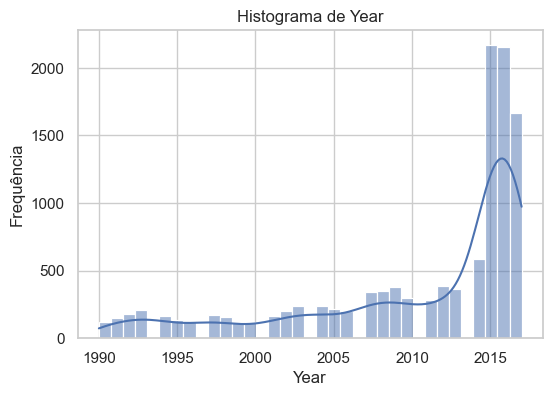

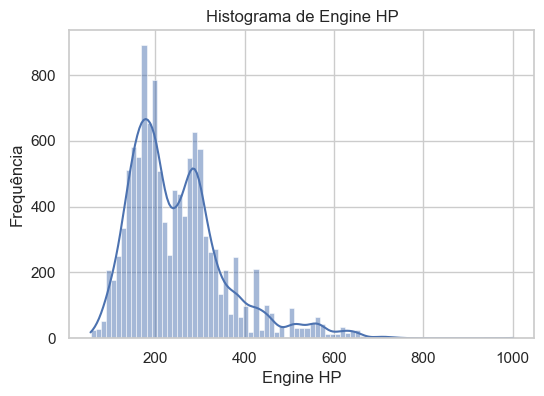

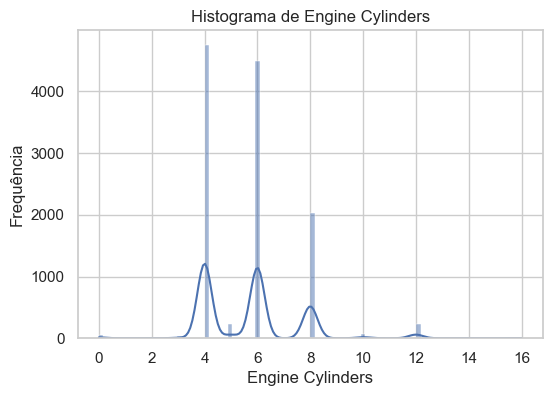

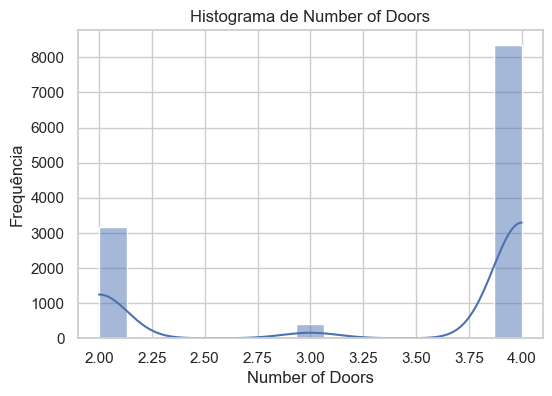

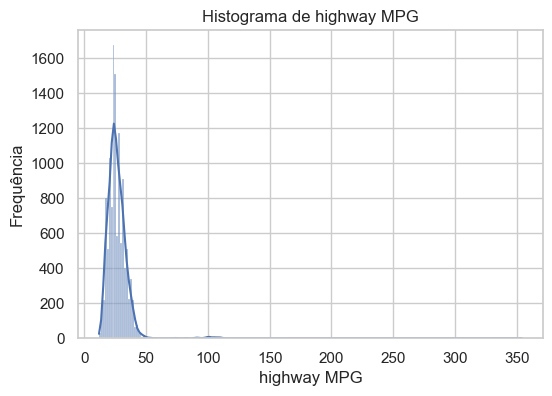

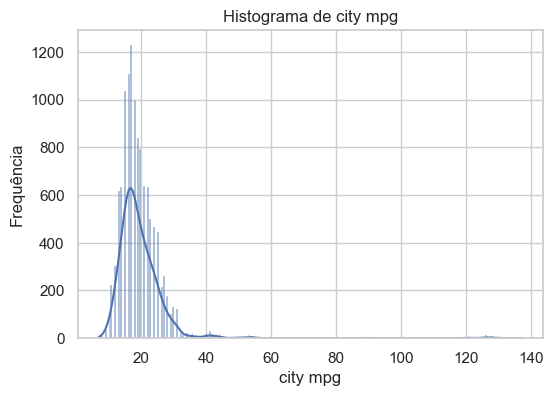

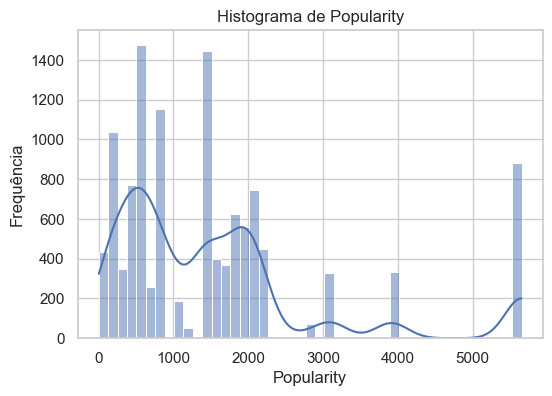

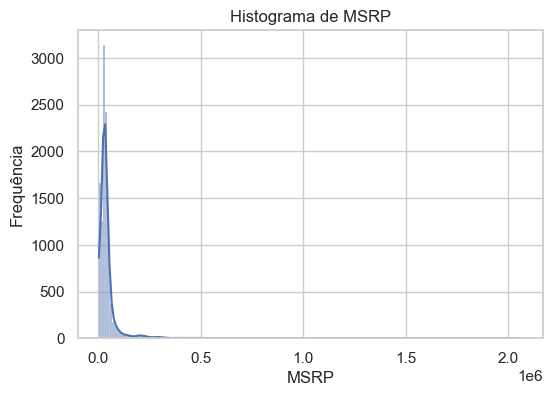

In [27]:
# histogramas para colunas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 4))  
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

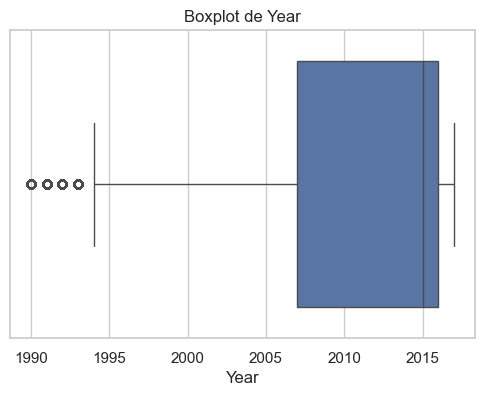

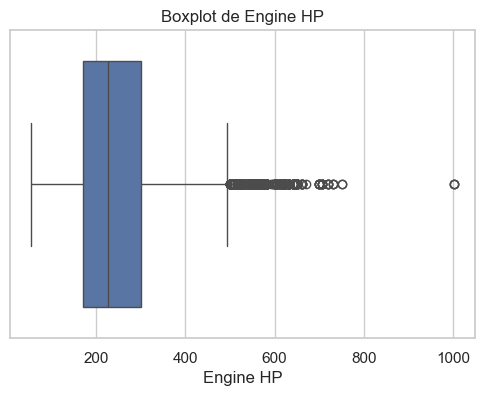

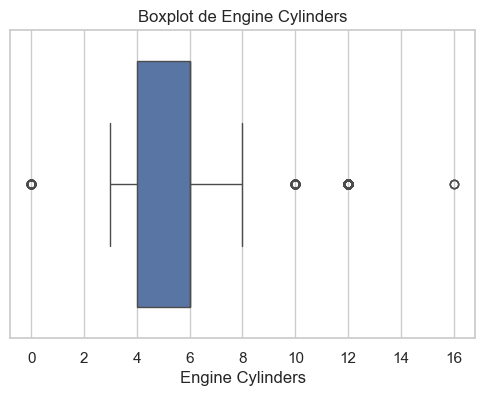

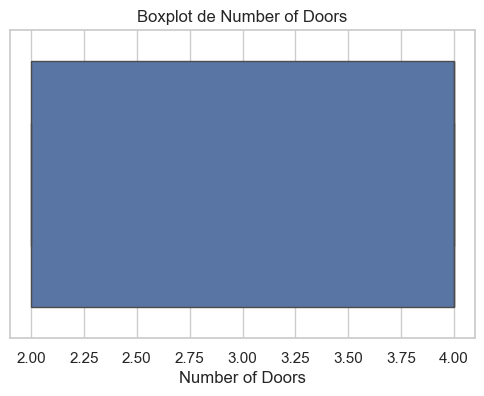

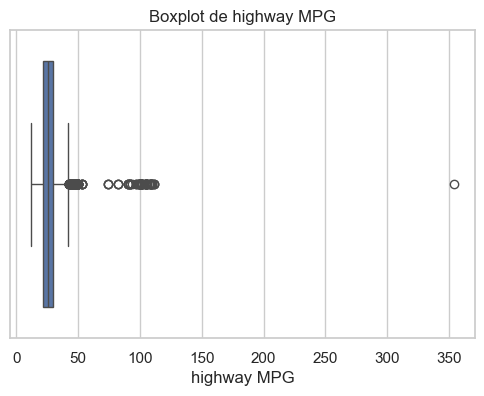

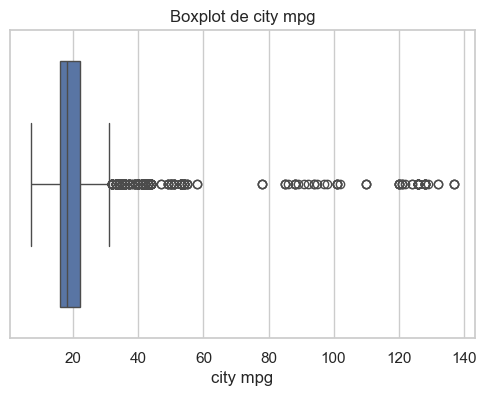

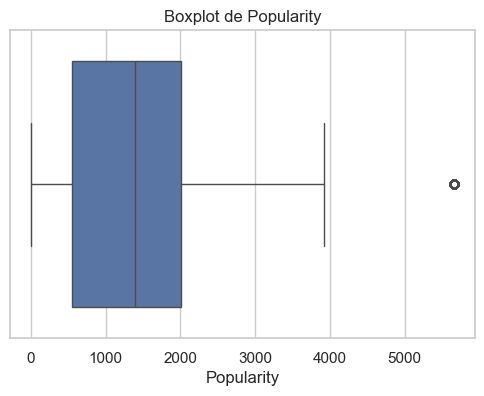

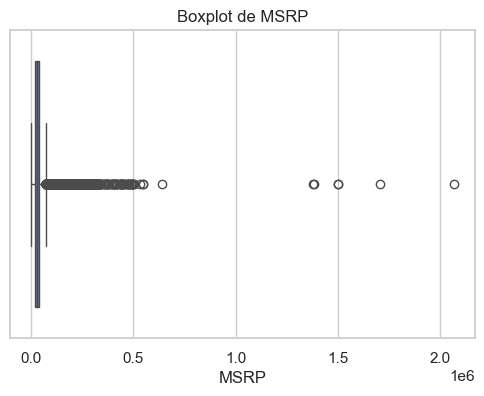

In [28]:
# BOXPLOTS
for col in num_cols:    
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

## 3. Matriz de correlaçao:

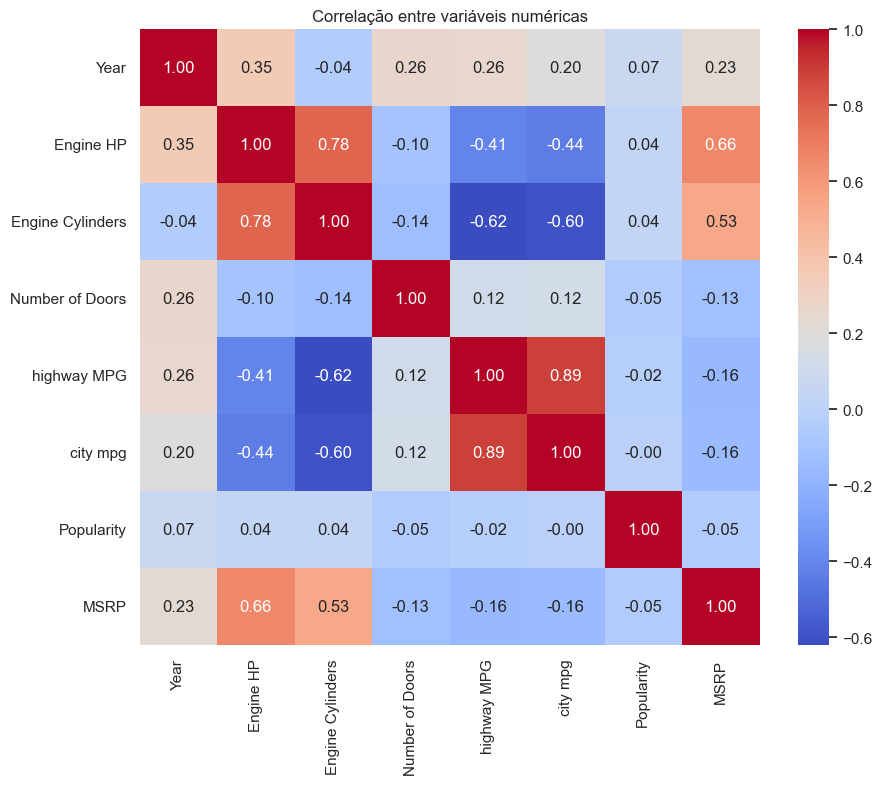

In [36]:
# Matriz de correlação
corr = df[num_cols].corr()

# Plot
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlação entre variáveis numéricas")
plt.show()

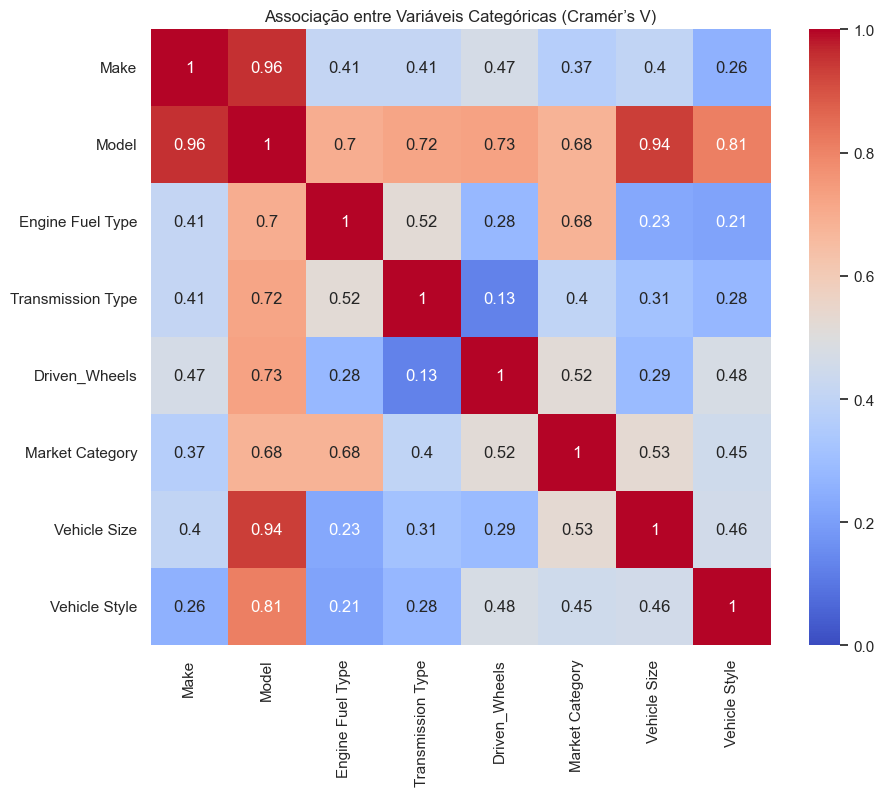

In [37]:
# --- Análise de variáveis categóricas ---
# Função para calcular Cramér’s V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# --- Selecionar colunas categóricas ---
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# --- Calcular matriz de Cramér’s V ---
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Converter para float
cramers_results = cramers_results.astype(float)

# --- Plotar heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title("Associação entre Variáveis Categóricas (Cramér’s V)")
plt.show()

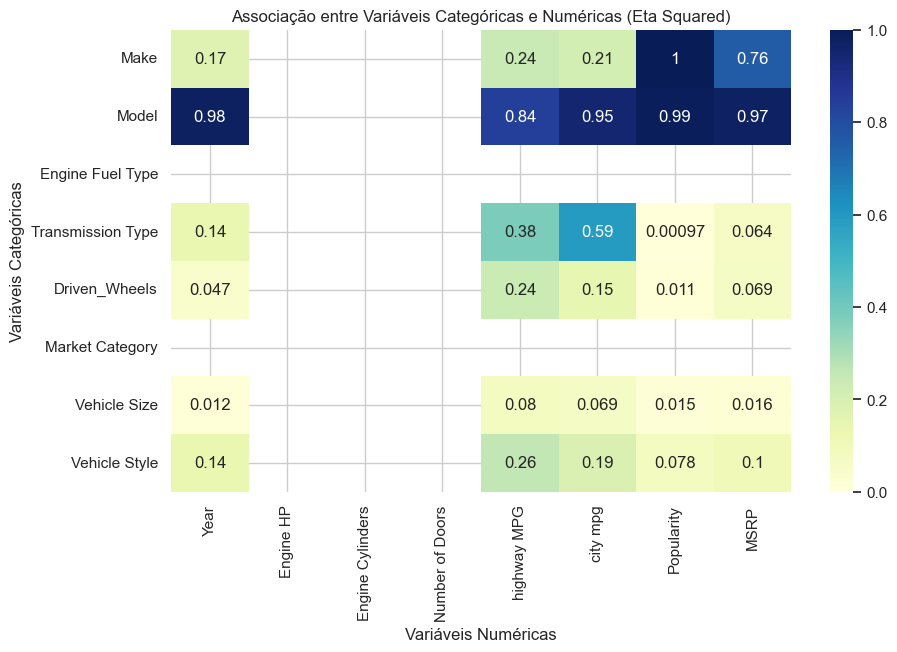

In [40]:
def eta_squared(x, y):
    mean_total = y.mean()
    groups = [y[x == val] for val in x.unique()]
    ss_between = sum(len(g) * (g.mean() - mean_total)**2 for g in groups)
    ss_total = sum((y - mean_total)**2)
    return ss_between / ss_total

# Criar matriz de resultados
eta_matrix = pd.DataFrame(index=cat_cols, columns=num_cols)

for cat in cat_cols:
    for num in num_cols:
        eta_matrix.loc[cat, num] = eta_squared(df[cat], df[num])

eta_matrix = eta_matrix.astype(float)

plt.figure(figsize=(10, 6))
sns.heatmap(eta_matrix, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Associação entre Variáveis Categóricas e Numéricas (Eta Squared)")
plt.xlabel("Variáveis Numéricas")
plt.ylabel("Variáveis Categóricas")
plt.show()

## 3. Dimensões de tempo:

<Axes: xlabel='Year'>

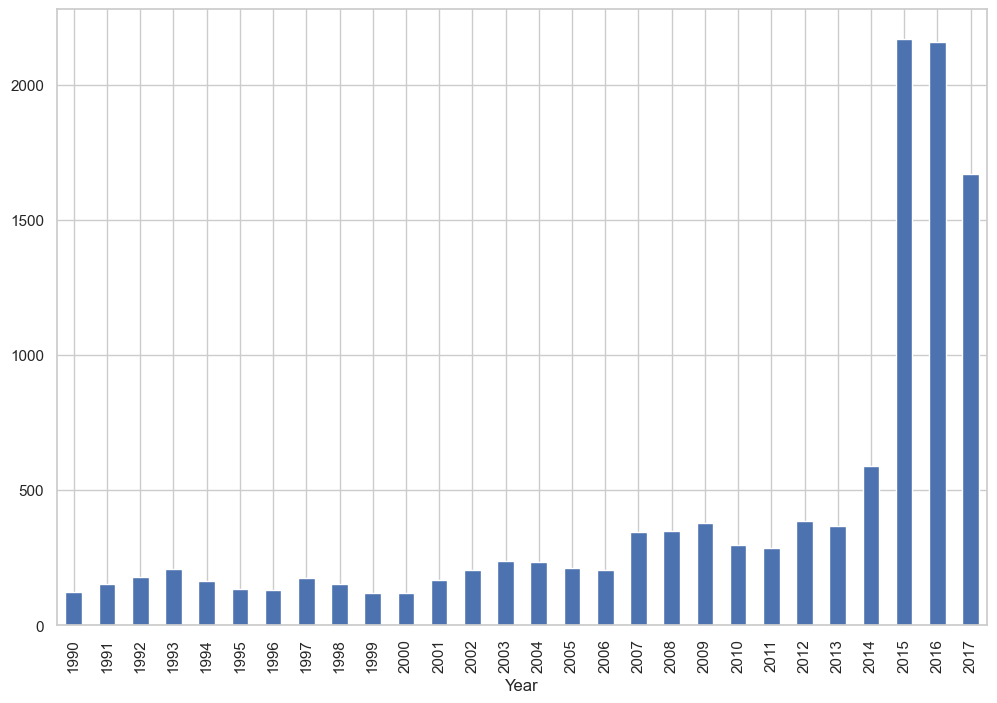

In [43]:
#Verificar Ano do veículo
df['Year'].value_counts().sort_index().plot(kind='bar')